<a href="https://colab.research.google.com/github/NehaVNayak/Infosys_AirQuality_September_2025_Neha/blob/main/milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: IMPORTING THE LIBRARIES

In [1]:
!pip install xgboost

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# For Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# For XGBoost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


# STEP 2: LOADING THE DATASET

In [6]:
air_aware_data = pd.read_csv(r"air_quality_data.csv")

In [7]:
print(air_aware_data.columns)
air_aware_data.head()

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
print("Info:")
display(air_aware_data.info())

print("Missing values per columns:")
display(air_aware_data.isnull().sum())

print("Descriptive stats:")
display(air_aware_data.describe(include='all').T)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


None

Missing values per columns:


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


Descriptive stats:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,29531,26,Ahmedabad,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29531,2009,2020-06-26,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,24933.0,NaN,NaN,NaN,67.450578,64.661449,0.04,28.82,48.57,80.59,949.99
PM10,18391.0,NaN,NaN,NaN,118.127103,90.60511,0.01,56.255,95.68,149.745,1000.0
NO,25949.0,NaN,NaN,NaN,17.57473,22.785846,0.02,5.63,9.89,19.95,390.68
NO2,25946.0,NaN,NaN,NaN,28.560659,24.474746,0.01,11.75,21.69,37.62,362.21
NOx,25346.0,NaN,NaN,NaN,32.309123,31.646011,0.0,12.82,23.52,40.1275,467.63
NH3,19203.0,NaN,NaN,NaN,23.483476,25.684275,0.01,8.58,15.85,30.02,352.89
CO,27472.0,NaN,NaN,NaN,2.248598,6.962884,0.0,0.51,0.89,1.45,175.81
SO2,25677.0,NaN,NaN,NaN,14.531977,18.133775,0.01,5.67,9.16,15.22,193.86


## Handle missing values, duplicates,and wrong data

In [9]:
# Drop duplicates
air_aware_data.drop_duplicates(inplace=True)

In [10]:
pollutant_cols = ['AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

# covert columns to numeric, coercing errors to NaN
for col in pollutant_cols:
    air_aware_data[col] = pd.to_numeric(air_aware_data[col] ,errors = 'coerce')

# Fill missing numeric values with median
for col in pollutant_cols:
    median_val = air_aware_data[col].median()
    air_aware_data[col].fillna(median_val)

# remove negative values if any
for col in pollutant_cols:
    air_aware_data = air_aware_data[air_aware_data[col] >= 0]

# Exploratory Data Analysis(EDA)

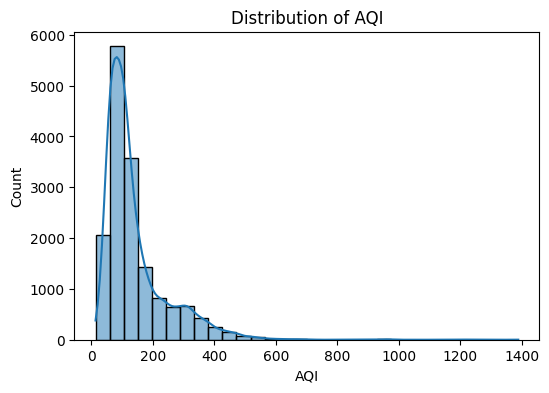

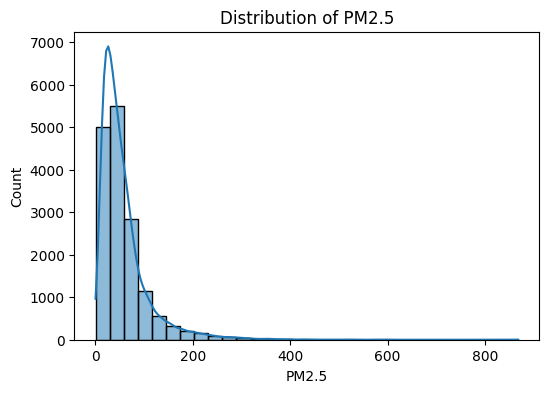

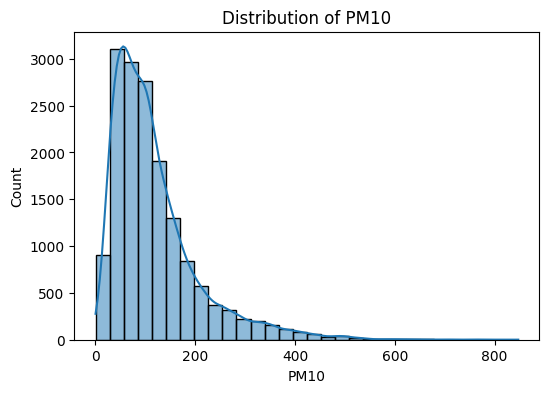

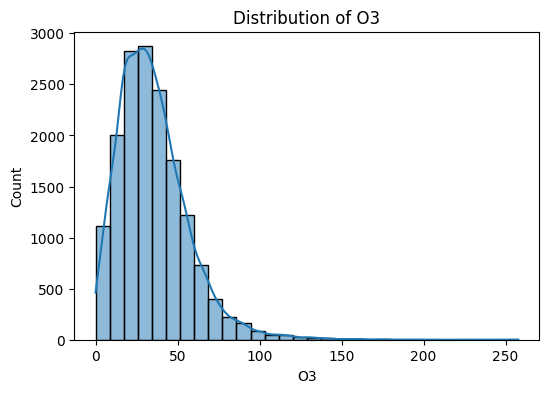

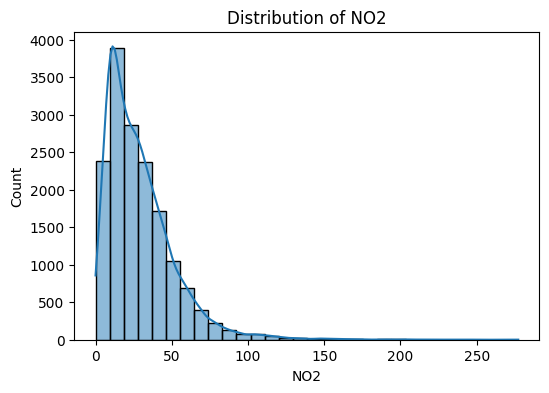

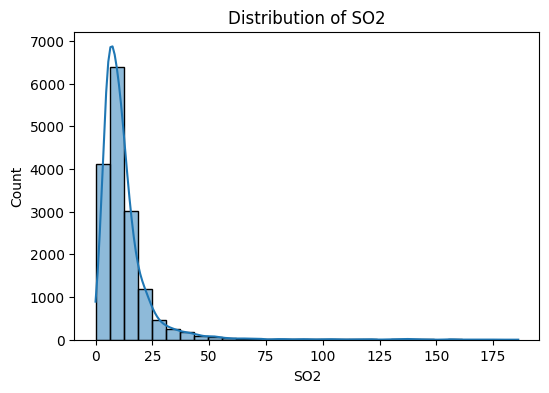

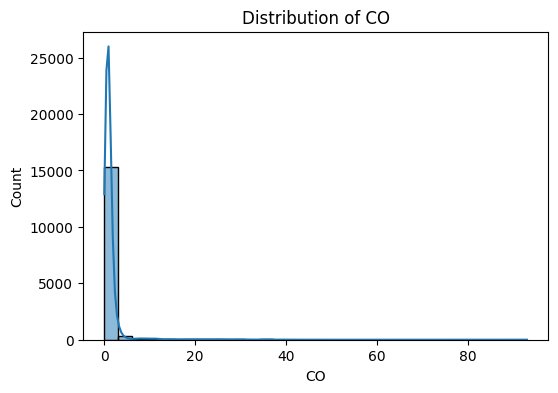

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in pollutant_cols:
    plt.figure(figsize=(6,4))  # corrected parameter
    sns.histplot(air_aware_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Feature Scaling

In [12]:
# Scale all numeric pollutant columns between 0 and 1
scaler = MinMaxScaler()
air_aware_data[pollutant_cols] = scaler.fit_transform(air_aware_data[pollutant_cols])

print("Scaled data sample:\n", air_aware_data.head())

Scaled data sample:
            City        Date     PM2.5      PM10     NO       NO2    NOx  NH3  \
1595  Ahmedabad  2019-05-15  0.043051  0.144270  15.08  0.306924  58.72  NaN   
1596  Ahmedabad  2019-05-16  0.038929  0.137082  14.67  0.287414  55.61  NaN   
1597  Ahmedabad  2019-05-17  0.040668  0.153311  18.02  0.279841  58.41  NaN   
1598  Ahmedabad  2019-05-18  0.039090  0.163037  13.27  0.271259  51.83  NaN   
1599  Ahmedabad  2019-05-19  0.038607  0.131664  34.56  0.248431  69.77  NaN   

            CO       SO2        O3  Benzene  Toluene  Xylene       AQI  \
1595  0.162220  0.876014  0.187102    16.44    85.54   14.19  0.194182   
1596  0.157810  0.490407  0.201187    15.55    83.89   13.15  0.229818   
1597  0.193847  0.528511  0.151249    15.88    83.83   13.34  0.248727   
1598  0.142750  0.476434  0.163782    15.93    82.73   13.44  0.250909   
1599  0.371773  0.434729  0.143334    15.53    84.17   13.19  0.387636   

     AQI_Bucket  
1595       Poor  
1596  Very Poor  

In [13]:
# Features and target
X = air_aware_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = air_aware_data['AQI']

print("Feature sample:\n", X.head())
print("Target sample:\n", y.head())

Feature sample:
          PM2.5      PM10        O3       NO2       SO2        CO
1595  0.043051  0.144270  0.187102  0.306924  0.876014  0.162220
1596  0.038929  0.137082  0.201187  0.287414  0.490407  0.157810
1597  0.040668  0.153311  0.151249  0.279841  0.528511  0.193847
1598  0.039090  0.163037  0.163782  0.271259  0.476434  0.142750
1599  0.038607  0.131664  0.143334  0.248431  0.434729  0.371773
Target sample:
 1595    0.194182
1596    0.229818
1597    0.248727
1598    0.250909
1599    0.387636
Name: AQI, dtype: float64


In [14]:
air_aware_data.to_csv("cleaned_air_quality_data.csv", index=False)

In [15]:
# Load your cleaned dataset
air_aware_data= pd.read_csv("cleaned_air_quality_data.csv")

air_aware_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2019-05-15,0.043051,0.144270,15.08,0.306924,58.72,NaN,0.162220,0.876014,0.187102,16.44,85.54,14.19,0.194182,Poor
1,Ahmedabad,2019-05-16,0.038929,0.137082,14.67,0.287414,55.61,NaN,0.157810,0.490407,0.201187,15.55,83.89,13.15,0.229818,Very Poor
2,Ahmedabad,2019-05-17,0.040668,0.153311,18.02,0.279841,58.41,NaN,0.193847,0.528511,0.151249,15.88,83.83,13.34,0.248727,Very Poor
3,Ahmedabad,2019-05-18,0.039090,0.163037,13.27,0.271259,51.83,NaN,0.142750,0.476434,0.163782,15.93,82.73,13.44,0.250909,Very Poor
4,Ahmedabad,2019-05-19,0.038607,0.131664,34.56,0.248431,69.77,NaN,0.371773,0.434729,0.143334,15.53,84.17,13.19,0.387636,Severe


# STEP 3 : EXPLORING THE DATA

In [16]:
# Basic stats
print(air_aware_data.describe())

# Check for missing values
print(air_aware_data.isnull().sum())

# Handle missing data if any
air_aware_data = air_aware_data.fillna(method='ffill')

              PM2.5          PM10            NO           NO2           NOx  \
count  16010.000000  16010.000000  15944.000000  16010.000000  15613.000000   
mean       0.065841      0.138708     18.193977      0.104950     34.436356   
std        0.059984      0.104439     23.194513      0.082331     31.570060   
min        0.000000      0.000000      0.030000      0.000000      0.000000   
25%        0.028647      0.066617      5.160000      0.044861     14.240000   
50%        0.049223      0.112655     10.265000      0.086891     25.900000   
75%        0.080184      0.175298     21.042500      0.141940     43.390000   
max        1.000000      1.000000    270.090000      1.000000    293.100000   

                NH3            CO           SO2            O3       Benzene  \
count  14402.000000  16010.000000  16010.000000  16010.000000  14088.000000   
mean      20.780396      0.015436      0.068662      0.136281      3.774501   
std       17.353468      0.038176      0.072533    

# STEP 4: SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [17]:
from sklearn.preprocessing import StandardScaler
# Select features and target
X = air_aware_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = air_aware_data['AQI']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Scale features for models that need normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 5: BUILDING EACH MODEL

In [18]:
# STEP 5.1: BUILDING ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare AQI as time series
aqi_series = air_aware_data['AQI'].fillna(method='ffill')

# Split into train and test (80-20)
train_size = int(len(aqi_series) * 0.8)
train, test = aqi_series[:train_size], aqi_series[train_size:]

# Build and fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
forecast_arima = arima_fit.forecast(steps=len(test))

# Evaluate
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)
print("ARIMA -> MAE:", mae_arima, " RMSE:", rmse_arima)

ARIMA -> MAE: 0.03519106563703701  RMSE: 0.05196817661771452


In [19]:
# STEP 5.2: BUILDING PROPHET MODEL
from prophet import Prophet

# Create Prophet-compatible dataframe
prophet_df = air_aware_data.copy()
prophet_df['ds'] = pd.date_range(start='2020-01-01', periods=len(prophet_df), freq='D')
prophet_df['y'] = prophet_df['AQI']

# Split train and test
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Build Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Forecast for the test period
future = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast_prophet = prophet_model.predict(future)

# Extract forecasted values
y_pred_prophet = forecast_prophet['yhat'][-len(test_prophet):]

# Evaluate
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], y_pred_prophet))
mae_prophet = mean_absolute_error(test_prophet['y'], y_pred_prophet)
print("Prophet -> MAE:", mae_prophet, " RMSE:", rmse_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpycxe1xh8/6vpy1sr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpycxe1xh8/dtm2t1n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64272', 'data', 'file=/tmp/tmpycxe1xh8/6vpy1sr6.json', 'init=/tmp/tmpycxe1xh8/dtm2t1n4.json', 'output', 'file=/tmp/tmpycxe1xh8/prophet_modelbfxw1xnu/prophet_model-20251022031701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet -> MAE: 0.03579851355843791  RMSE: 0.05238303609425266


In [20]:
# STEP 5.3: BUILDING XGBOOST MODEL
from xgboost import XGBRegressor

# Build and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost -> MAE:", mae_xgb, " RMSE:", rmse_xgb)

XGBoost -> MAE: 0.011913808949482518  RMSE: 0.017782704150101535


# STEP 5.4: BUILDING LSTM MODEL


In [21]:
# Load and Preprocess the Dataset
from tensorflow.keras.callbacks import EarlyStopping


In [22]:
# Example: Use your Air Quality DataFrame
df = air_aware_data.copy()

# Choose target variable (AQI or PM2.5)
target_col = 'AQI'

# Fill missing values
df = df.fillna(method='ffill')

# Normalize the target feature for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_col]])

In [23]:
# Create Time Series Sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Use 24-hour window (or choose any lag)
time_steps = 24
X, y = create_sequences(scaled_data, time_steps)

# Split into train and test sets (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [24]:
# Build the LSTM Model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the Model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_pred = lstm_model.predict(X_test)

# Inverse transform to get original AQI values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("LSTM -> MAE:", mae_lstm, " RMSE:", rmse_lstm)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0041 - val_loss: 9.3291e-04
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0020 - val_loss: 8.0396e-04
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0020 - val_loss: 8.9460e-04
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0019 - val_loss: 7.7605e-04
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0020 - val_loss: 6.5466e-04
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0016 - val_loss: 6.0898e-04
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0016 - val_loss: 6.1335e-04
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0016 - val_loss: 5.5433e-04
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0017 - val_loss: 6.2190e-04
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0018 - val_loss: 5.3367e-04
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM -> MAE: 0.014483957081906942  RMSE: 0.02373

In [29]:
# Dictionary of trained models
models = {
    'ARIMA': arima_model,
    'Prophet': prophet_model,
    'LSTM': lstm_model,
    'XGBoost': xgb_model
}

# Compare performance
results = pd.DataFrame({
    'Model': list(models.keys()),
    'MAE': [mae_arima, mae_prophet, mae_lstm, mae_xgb],
    'RMSE': [rmse_arima, rmse_prophet, rmse_lstm, rmse_xgb]
})

print("\n📊 Model Comparison:")
print(results)

# Find best model by lowest RMSE
best_model_name = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\n✅ Best Performing Model: {best_model_name}")

# Get the actual trained model object
best_model = models[best_model_name]

# Save the best model
import joblib
joblib.dump(best_model, f"best_{best_model_name.lower()}_model.joblib")

# Load later for inference
loaded_model = joblib.load(f"best_{best_model_name.lower()}_model.joblib")

# Example: make predictions (if applicable)
y_pred = loaded_model.predict(X_test_scaled)



📊 Model Comparison:
     Model       MAE      RMSE
0    ARIMA  0.035191  0.051968
1  Prophet  0.035799  0.052383
2     LSTM  0.014484  0.023731
3  XGBoost  0.011914  0.017783

✅ Best Performing Model: XGBoost


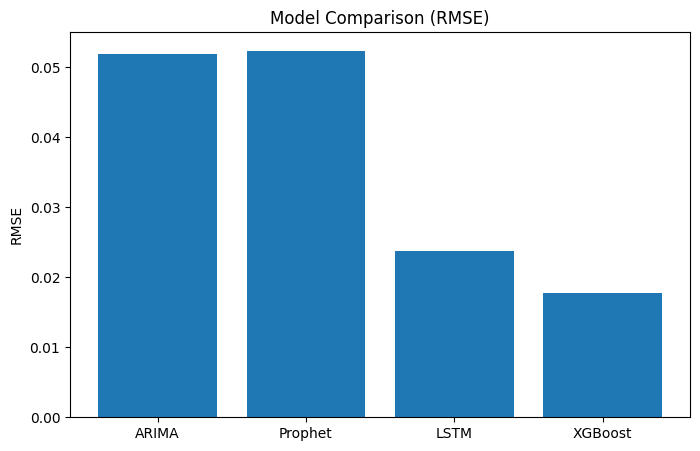

In [30]:
plt.figure(figsize=(8,5))
models = ['ARIMA', 'Prophet', 'LSTM', 'XGBoost']
rmses = [rmse_arima, rmse_prophet, rmse_lstm, rmse_xgb]
plt.bar(models, rmses)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()

## Train per city

In [31]:
# ----- Imports -----
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import joblib

# ----- Load Your Dataset -----
Example: df = pd.read_csv("cleaned_air_quality_data.csv")
# Make sure it has columns: City, AQI, PM2.5, PM10, O3, NO2, SO2, CO
print("✅ Dataset Loaded")

# ----- Get Unique Cities -----
cities = df['City'].unique()
print(f"📍 Found {len(cities)} cities: {cities}")

city_models = []
print("\n🚀 Starting Per-City Training...\n")

# ----- Train & Evaluate Model for Each City -----
for city in cities:
    print(f"🏙️ Training model for: {city}")

    # Filter data for this city
    city_data = df[df['City'] == city].dropna()
    if city_data.shape[0] < 50:
        print(f"⚠️ Skipping {city} (not enough data)\n")
        continue

    # Features and target
    X = city_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
    y = city_data['AQI']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Model
    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"✅ {city} - MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

    # Save this model and its scaler
    joblib.dump(model, f"{city}_xgb_model.joblib")
    joblib.dump(scaler, f"{city}_scaler.joblib")

    city_models.append({
        'City': city,
        'Model': model,
        'Scaler': scaler,
        'MAE': mae,
        'RMSE': rmse
    })



✅ Dataset Loaded
📍 Found 24 cities: ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Gurugram'
 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata' 'Mumbai'
 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram' 'Visakhapatnam']

🚀 Starting Per-City Training...

🏙️ Training model for: Ahmedabad
⚠️ Skipping Ahmedabad (not enough data)

🏙️ Training model for: Aizawl
✅ Aizawl - MAE: 0.00, RMSE: 0.00

🏙️ Training model for: Amaravati
✅ Amaravati - MAE: 0.01, RMSE: 0.01

🏙️ Training model for: Amritsar
✅ Amritsar - MAE: 0.01, RMSE: 0.03

🏙️ Training model for: Bengaluru
✅ Bengaluru - MAE: 0.01, RMSE: 0.02

🏙️ Training model for: Bhopal
✅ Bhopal - MAE: 0.01, RMSE: 0.02

🏙️ Training model for: Brajrajnagar
✅ Brajrajnagar - MAE: 0.01, RMSE: 0.02

🏙️ Training model for: Chandigarh
✅ Chandigarh - MAE: 0.01, RMSE: 0.01

🏙️ Training model for: Chennai
✅ Chennai - MAE: 0.01, RMSE: 0.02

🏙️ Training model for: Coimb

# Predict Future values using the best model and plot graph

In [32]:
import numpy as np
import pandas as pd

# Assume your dataset has these feature columns
features = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

# Get the last known row from your dataset
last_row = X_test.iloc[-1].copy()  # or from your original dataframe
future_predictions = []

# Predict next 20 future AQI values
for i in range(20):
    # Scale input
    X_scaled = scaler.transform([last_row])

    # Predict next AQI
    next_pred = xgb_model.predict(X_scaled)[0]
    future_predictions.append(next_pred)

    # OPTIONAL: update last_row for recursive prediction (if using past AQIs as input)
    # If AQI isn't one of the input features, you may instead update pollutant trends.
    # For simplicity, we'll keep the same last_row if your inputs are static pollutants.
    # Example: If your features have lag variables, shift them like:
    # last_row['AQI_lag_1'] = next_pred

# Display future predictions
future_df = pd.DataFrame({
    'Step': range(1, 21),
    'Predicted_AQI': np.round(future_predictions, 2)
})

print("\n🔮 20 Future AQI Predictions:")
print(future_df)



🔮 20 Future AQI Predictions:
    Step  Predicted_AQI
0      1           0.07
1      2           0.07
2      3           0.07
3      4           0.07
4      5           0.07
5      6           0.07
6      7           0.07
7      8           0.07
8      9           0.07
9     10           0.07
10    11           0.07
11    12           0.07
12    13           0.07
13    14           0.07
14    15           0.07
15    16           0.07
16    17           0.07
17    18           0.07
18    19           0.07
19    20           0.07


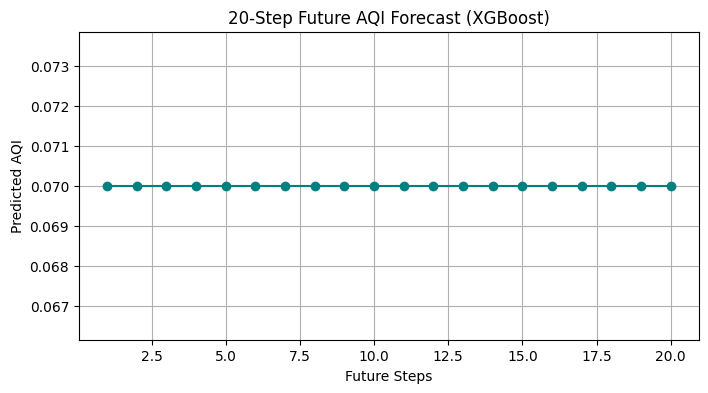

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(future_df['Step'], future_df['Predicted_AQI'], marker='o', color='teal')
plt.title("20-Step Future AQI Forecast (XGBoost)")
plt.xlabel("Future Steps")
plt.ylabel("Predicted AQI")
plt.grid(True)
plt.show()
